## CASTRO samples for subproblem 2 of 9 dimensional problem

This Notebook runs the CASTRO algorithm with multiple random seeds for generating feasible samples for the 4 dimensional subproblem 2 the 9 dimensional problem.

As components we have the amino-based components MEL, THAM, CS, BN, where for the synthesis, the following combinations are allowed: MEL+CS, THAM+CS, MEL+THAM and all of them are allowed as single components.

It contains the following steps:
1. Initialization
2. CASTRO samples
3. Sample selection applying synthesis constraints and choosing random samples, and illustration
4. Distribution plots
5. Write results to csv files
6. Show results


written by Christina Schenk

last updated on 08/01/2025

tested on Christina's M1 Mac

#### import python packages

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from pathlib import Path  
from sklearn.preprocessing import StandardScaler
import sys

sys.path.append('..')
from src.conditionedSampling import *
from src.plot import *
from src.utils import *

### **1. Initialization**

##### Specify the design space: lower and upper bounds for x and y, dim etc.

In [2]:
#Lower and upper bounds for x and y:
#amino-based acids:
CS_lb = 0.0
CS_ub = 1.0
MEL_lb = 0.0
MEL_ub = 1.0
THAM_lb = 0.0
THAM_ub = 1.0
BN_lb = 0.0
BN_ub = 1.0

x1_lb = MEL_lb
x1_ub = MEL_ub

x2_lb = THAM_lb
x2_ub = THAM_ub

x3_lb = CS_lb
x3_ub = CS_ub

x4_lb = BN_lb
x4_ub = BN_ub
#dimension of design space:
dim = 4
bounds = [[x1_lb,x1_ub],[x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]
#number of samples
n_samp = 100

### **2. CASTRO samples** 
#### Collect samples for all permutations of bounds (all selected or subset of samples selected with checking for distance)

#### Calculate all permutations of bounds

In [3]:
all_perms = []
all_perms += permutations(range(dim))

### Collect samples for all permutations of bounds (all selected or subset of samples selected with checking for distance)

In [4]:
#dimension of design space:
#dim = 4
tot_samp = 384
prev_bounds = [[x1_lb,x1_ub], [x2_lb,x2_ub], [x3_lb,x3_ub], [x4_lb,x4_ub]]
n_samp = tot_samp//len(all_perms)
tol_norm = 5e-1
num_select = 4
max_rej = n_samp//4

In [5]:
#num_select = 5
all_select = True
max_rej = n_samp//1
#uses default seeds of 5 random seeds=[42, 123, 7, 99, 56]
all_val_samples_selected, all_val_samples_mdu_selected, mean_samples, std_samples, mean_samples_mdu, std_samples_mdu = prob_sample_with_bound_permutations(
prev_bounds=prev_bounds, n_samp=n_samp, tol_norm=tol_norm,
    all_select=all_select, num_select=num_select, max_rej=max_rej,
    dim=dim, verbose=True)
# Verify results
print("Shape of all_val_samples_selected:", all_val_samples_selected.shape)
print("Shape of mean_samples:", mean_samples.shape)
print("Shape of all_val_samples_selected:", all_val_samples_mdu_selected.shape)
print("Shape of mean_samples:", mean_samples_mdu.shape)

Shape of all_val_samples_selected: (5, 99, 4)
Shape of mean_samples: (99, 4)
Shape of all_val_samples_selected: (5, 101, 4)
Shape of mean_samples: (101, 4)


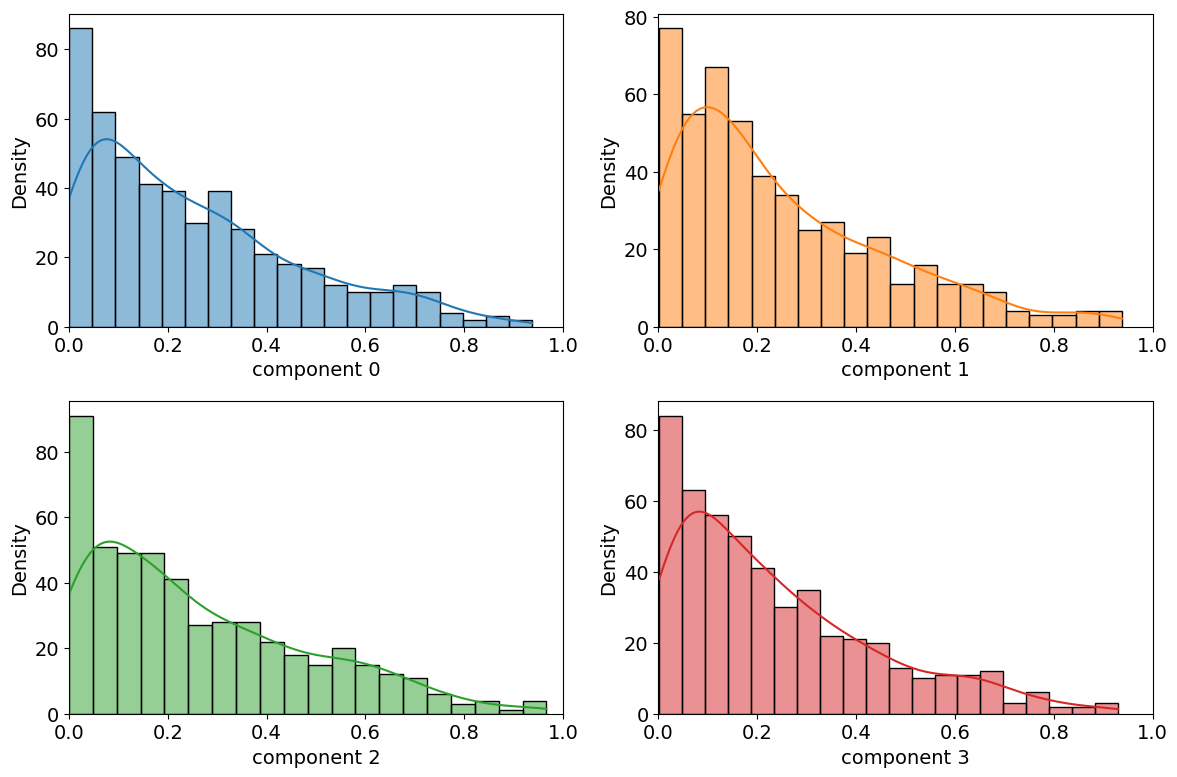

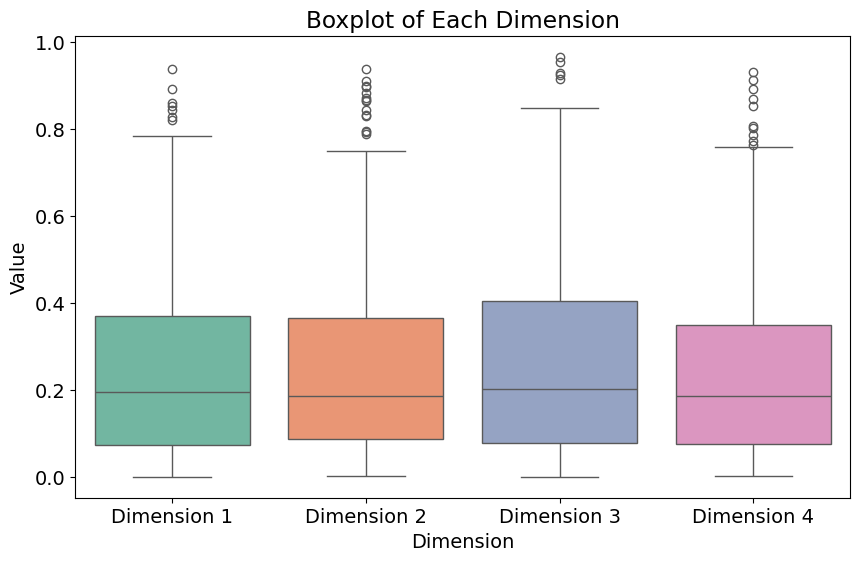

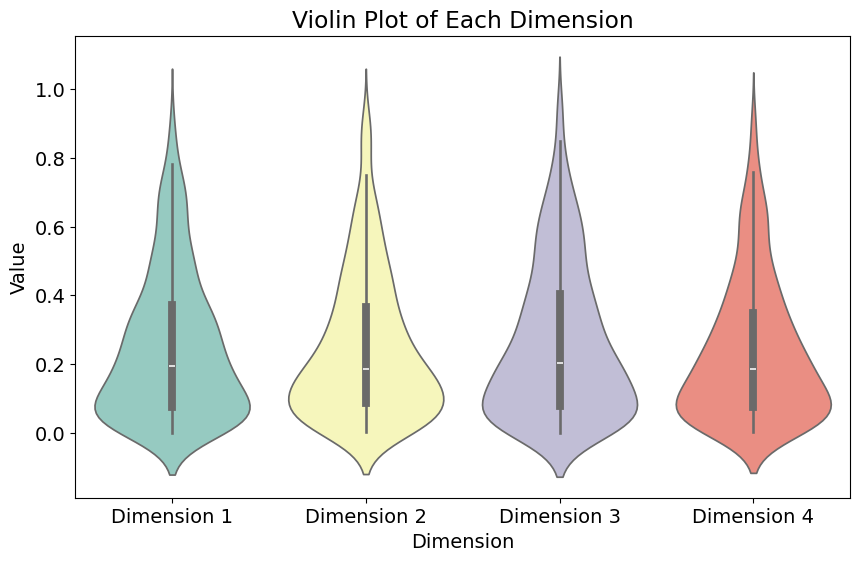

In [6]:
# Combine all samples into a single array (shape: num_seeds * n_samp, n_dim)
combined_samples = all_val_samples_selected.reshape(-1, dim)

# Plot settings
#sns.set(style="whitegrid")
dim_labels = [f"Dimension {i+1}" for i in range(dim)]

# Plot 1: Histograms for each dimension
plt.figure(figsize=(12, 8))
for i in range(dim):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(combined_samples[:, i], bins=20, kde=True, color=f"C{i}")
    #ax.set_title(f"Histogram of {dim_labels[i]}")
    ax.set_xlabel(f"component {i}")
    ax.set_ylabel("Density")
    if bounds is not None and i < len(bounds):
        ax.set_xlim(bounds[i])  # Correct way to set x-limits for each subplot
plt.tight_layout()
plt.show()


# Plot 2: Boxplot for each dimension
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_samples, palette="Set2")
plt.title("Boxplot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

# Plot 3: Violin Plot for Each Dimension
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_samples, palette="Set3")
plt.title("Violin Plot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

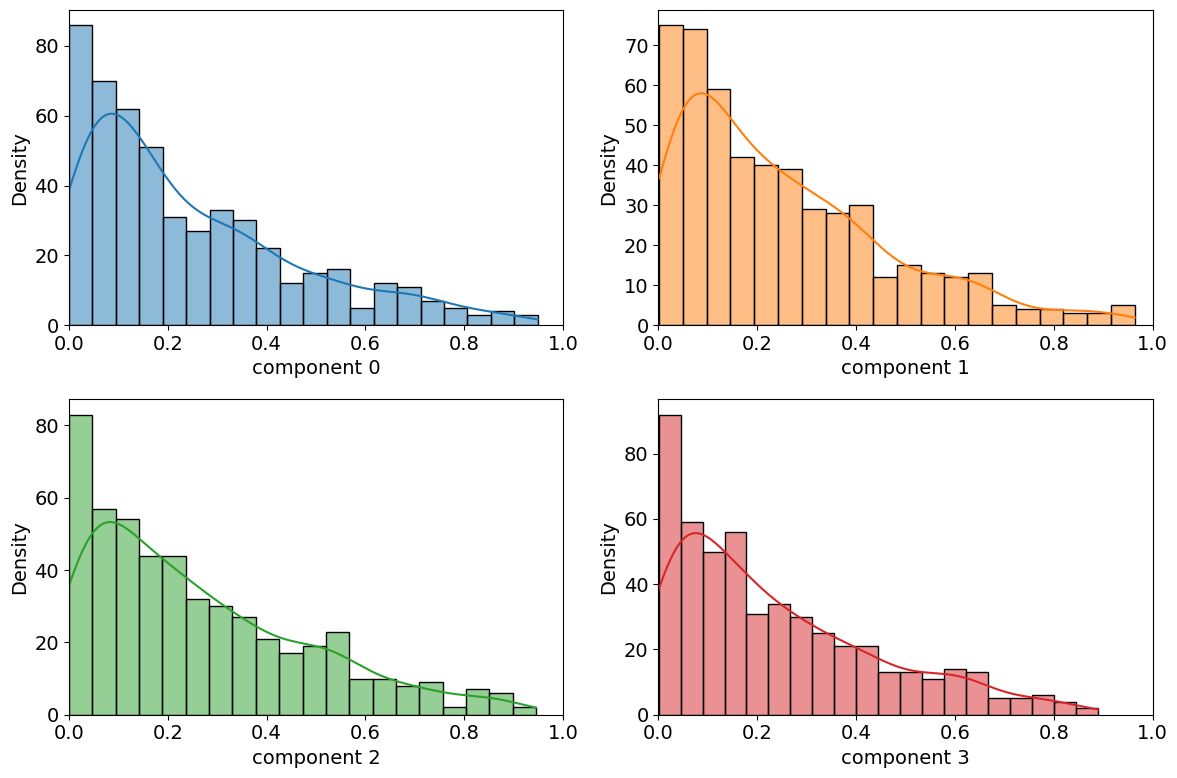

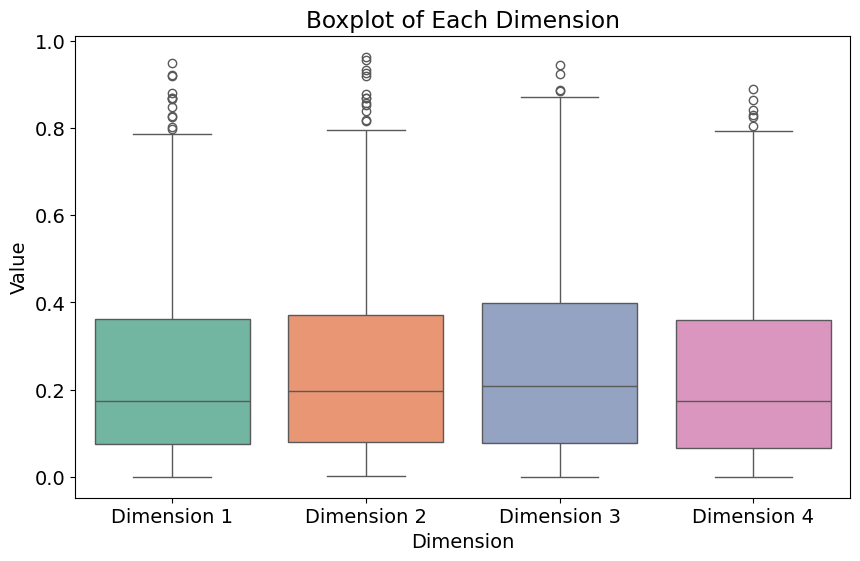

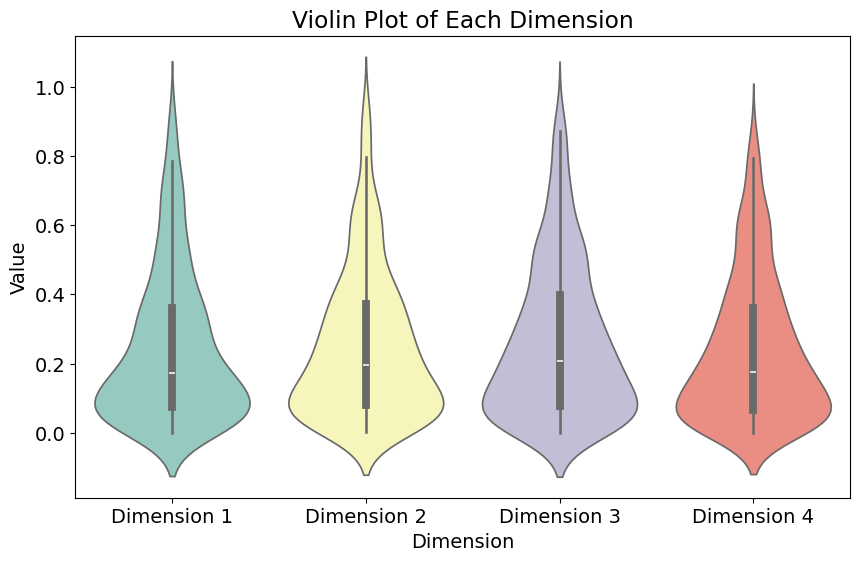

In [7]:
# Combine all samples into a single array (shape: num_seeds * n_samp, n_dim)
combined_samples_2 = all_val_samples_mdu_selected.reshape(-1, dim)

# Plot settings
#sns.set(style="whitegrid")
dim_labels = [f"Dimension {i+1}" for i in range(dim)]

# Plot 1: Histograms for each dimension
plt.figure(figsize=(12, 8))
for i in range(dim):
    ax = plt.subplot(2, 2, i + 1)
    sns.histplot(combined_samples_2[:, i], bins=20, kde=True, color=f"C{i}")
    #ax.set_title(f"Histogram of {dim_labels[i]}")
    ax.set_xlabel(f"component {i}")
    ax.set_ylabel("Density")
    if bounds is not None and i < len(bounds):
        ax.set_xlim(bounds[i])  # Correct way to set x-limits for each subplot
plt.tight_layout()
plt.show()


# Plot 2: Boxplot for each dimension
plt.figure(figsize=(10, 6))
sns.boxplot(data=combined_samples_2, palette="Set2")
plt.title("Boxplot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

# Plot 3: Violin Plot for Each Dimension
plt.figure(figsize=(10, 6))
sns.violinplot(data=combined_samples_2, palette="Set3")
plt.title("Violin Plot of Each Dimension")
plt.xlabel("Dimension")
plt.ylabel("Value")
plt.xticks(range(dim), dim_labels)
plt.show()

In [8]:
# Select most uniform samples
uniform_samples = select_most_uniform_samples(combined_samples, num_samples=90)
uniform_samples2 = select_most_uniform_samples(combined_samples_2, num_samples=90)
print(f"Shape of uniform samples: {uniform_samples.shape}")
print(f"Shape of uniform samples: {uniform_samples2.shape}")

Shape of uniform samples: (90, 4)
Shape of uniform samples: (90, 4)


In [9]:
all_val_samples = uniform_samples
all_val_samples_mdu = uniform_samples2

### **3. Sample selection applying synthesis constraints and choosing random samples, and illustration**

#### Import data and format

In [10]:
filename = './data/Bank_Data-2808_mod_corrected.csv'
df = pd.read_csv(filename, sep=';', decimal=",")
df = df.div(100.)
print(df, len(df))
data_array = np.zeros((len(df),dim))
data_array = np.column_stack((df['Mel'].to_numpy(), df['THAM'], df['CS'], df['BN']))#
data_array

    PA-56    HNT    PhA   CS   BN   THAM   CaBO   ZnBO    Mel  met-based  \
0    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
1    1.00  0.000  0.000  0.0  0.0  0.000  0.000  0.000  0.000      0.000   
2    0.95  0.000  0.017  0.0  0.0  0.033  0.000  0.000  0.000      0.000   
3    0.95  0.000  0.017  0.0  0.0  0.017  0.000  0.017  0.000      0.017   
4    0.95  0.000  0.017  0.0  0.0  0.017  0.017  0.000  0.000      0.017   
..    ...    ...    ...  ...  ...    ...    ...    ...    ...        ...   
70   0.90  0.050  0.000  0.0  0.0  0.000  0.000  0.000  0.050      0.050   
71   0.97  0.020  0.000  0.0  0.0  0.000  0.000  0.000  0.010      0.020   
72   0.95  0.033  0.000  0.0  0.0  0.000  0.000  0.000  0.017      0.033   
73   0.93  0.047  0.000  0.0  0.0  0.000  0.000  0.000  0.023      0.047   
74   0.90  0.067  0.000  0.0  0.0  0.000  0.000  0.000  0.033      0.067   

    am-based  
0      0.000  
1      0.000  
2      0.033  
3      0.017  
4      0.017

array([[0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.033, 0.   , 0.   ],
       [0.   , 0.017, 0.   , 0.   ],
       [0.   , 0.017, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.047, 0.   , 0.   ],
       [0.   , 0.023, 0.   , 0.   ],
       [0.   , 0.023, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.067, 0.   , 0.   ],
       [0.   , 0.033, 0.   , 0.   ],
       [0.   , 0.033, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.015, 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.025, 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.035, 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.05 , 0.   ],
 

#### Transform data (just works if no combinations in data, otherwise needs to be adjusted), 0 1 single component samples

In [11]:
#transform data, such that the two add up to 100%:
for i in range(len(data_array)):
    if np.all(data_array[i,1:3]==0) and data_array[i,0]!=0:
        data_array[i,0] = 1 
    elif data_array[i,0]==0 and np.all(data_array[i,2:3]==0) and data_array[i,1]!=0:
        data_array[i,1] = 1
    elif np.all(data_array[i,0:1]==0) and data_array[i,2]!=0 and data_array[i,3]==0:
        data_array[i,2] = 1
    elif np.all(data_array[i,0:2]==0) and data_array[i,3]!=0:
        data_array[i,3] = 1
    elif np.all(data_array[i,0:3]==0):
        data_array[i,0:3] = 0
    else:
        data_array[i,0] = data_array[i,0]/(data_array[i,0]+data_array[i,1]+data_array[i,2]+data_array[i,3])
        data_array[i,1] = data_array[i,1]/(data_array[i,0]+data_array[i,1]+data_array[i,2]+data_array[i,3])
        data_array[i,2] = data_array[i,2]/(data_array[i,0]+data_array[i,1]+data_array[i,2]+data_array[i,3])

#### Standardize data

In [12]:
scaler = StandardScaler().fit(data_array)
data_scaled = scaler.transform(data_array)
scaler2 = StandardScaler().fit(all_val_samples)
all_val_samples_scaled = scaler2.transform(all_val_samples)
scaler3 = StandardScaler().fit(all_val_samples_mdu)
all_val_samples_mdu_scaled = scaler3.transform(all_val_samples_mdu)

In [13]:
print(len(all_val_samples))
print(len(all_val_samples_mdu))

90
90


#### Transform with PCA and plot in two dimensions for both LHS(MDU) samples and Data
#### Check variance ratios

In [14]:
pca = PCA(n_components=2)
Xt1 = pca.fit_transform(data_scaled)
print("variance ratio data", pca.explained_variance_ratio_)
print("variance ratio norm data", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt2 = pca.fit_transform(all_val_samples_scaled)
print("variance ratio lhs", pca.explained_variance_ratio_)
print("variance ratio norm lhs", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)
Xt3 = pca.fit_transform(all_val_samples_mdu_scaled)
print("variance ratio lhsmdu", pca.explained_variance_ratio_)
print("variance ratio norm lhsmdu", np.linalg.norm(pca.explained_variance_ratio_))
print(pca.components_)

variance ratio data [0.31549387 0.30948061]
variance ratio norm data 0.4419441509411004
[[-0.20540975 -0.58122577  0.78704085 -0.02345492]
 [ 0.7892166  -0.57385739 -0.21700634  0.02707602]]
variance ratio lhs [0.34617589 0.33691982]
variance ratio norm lhs 0.4830659558714588
[[-0.58909192  0.13230932  0.73635399 -0.30536496]
 [-0.55166261  0.62702751 -0.39549992  0.38221026]]
variance ratio lhsmdu [0.34657378 0.33327608]
variance ratio norm lhsmdu 0.4808183959261082
[[-0.54931447  0.16359052  0.72962854 -0.37300663]
 [ 0.2192297   0.70446013 -0.30162706 -0.60390014]]


#### Scatterplot for reduced 2 dimensional PCA points

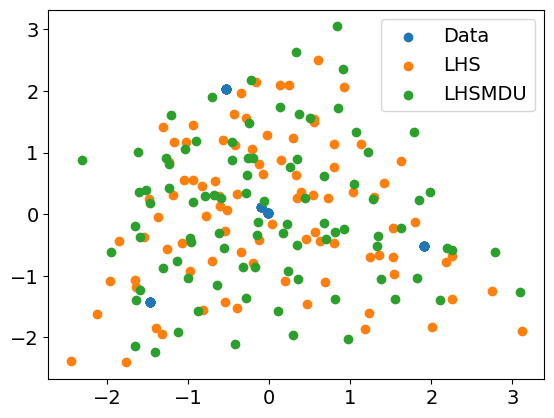

In [15]:
plot_dimred_2dims_both_methods(Xt1, Xt2, Xt3)

### Synthesis constraint, combinations allowed: Mel +CS, THAM+CS, Mel+THAM, single amino Mel, THAM, CS, BN

In [16]:
all_val_samples = apply_mixed_synthesis_constraint(all_val_samples) 
all_val_samples_mdu = apply_mixed_synthesis_constraint(all_val_samples_mdu) 

#### Make sure that sum up to 1

In [17]:
for i in range(len(all_val_samples)):
    if np.sum(all_val_samples[i,:])!=1:
        err = 1-np.sum(all_val_samples[i,:])
        ind_err = np.random.choice(np.where(all_val_samples[i,:]!=0)[0])
        all_val_samples[i,ind_err] = all_val_samples[i,ind_err]+err

for i in range(len(all_val_samples_mdu)):
    if np.sum(all_val_samples_mdu[i,:])!=1:
        err = 1-np.sum(all_val_samples_mdu[i,:])
        ind_err = np.random.choice(np.where(all_val_samples_mdu[i,:]!=0)[0])
        all_val_samples_mdu[i,ind_err] = all_val_samples_mdu[i,ind_err]+err



In [18]:
all_val_samples
len(all_val_samples)

90

### Select 90 random points

In [19]:
des_n_samp = 90

In [20]:
tol_samples_unscaled = select_des_n_samp_random_pts(all_val_samples, des_n_samp=des_n_samp)

In [21]:
tol_samples_LHSMDU_unscaled = select_des_n_samp_random_pts(all_val_samples_mdu, des_n_samp=des_n_samp)

#### Standardize data

In [22]:
scaler2 = StandardScaler().fit(tol_samples_unscaled)
tol_samples = scaler2.transform(tol_samples_unscaled)
scaler3 = StandardScaler().fit(tol_samples_LHSMDU_unscaled)
tol_samples_LHSMDU = scaler3.transform(tol_samples_LHSMDU_unscaled)

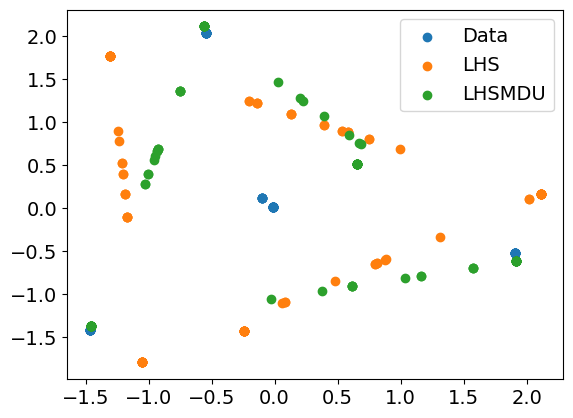

In [23]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
lhs_samples_pca = pca.fit_transform(tol_samples)
lhsmdu_samples_pca = pca.fit_transform(tol_samples_LHSMDU)

plot_dimred_2dims_both_methods(data_pca, lhs_samples_pca, lhsmdu_samples_pca)

#### Test whether all selected samples are feasible

In [24]:
for i in range(len(tol_samples_unscaled)):
    for j in range(dim):
        if tol_samples_unscaled[i,j]<prev_bounds[j][0] or tol_samples_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_unscaled[i,:])
print("-------------------")
for i in range(len(tol_samples_LHSMDU_unscaled)):
    for j in range(dim):
        if tol_samples_LHSMDU_unscaled[i,j]<prev_bounds[j][0] or tol_samples_LHSMDU_unscaled[i,j]>prev_bounds[j][1]:
            print("not feasible", tol_samples_LHSMDU_unscaled[i,:])

-------------------


 ### **4. Distribution plots**

#### Distribution plots of scaled data

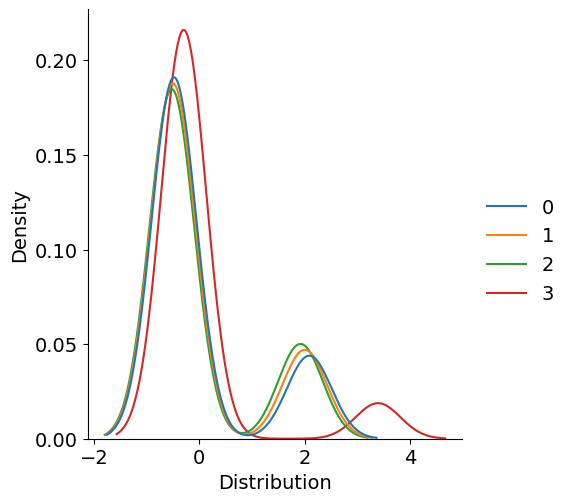

In [25]:
distplot_samples(data_scaled)

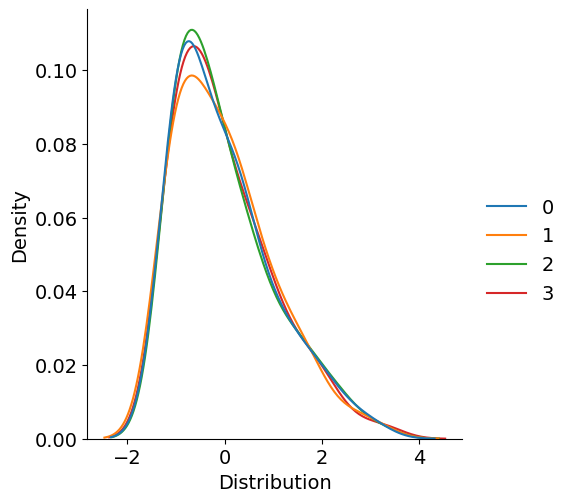

In [26]:
distplot_samples(all_val_samples_scaled)

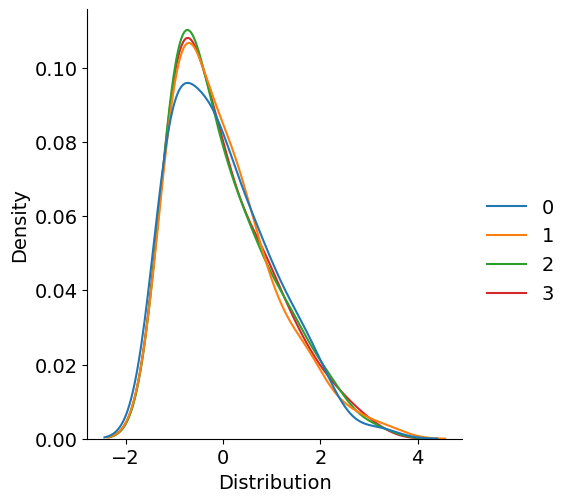

In [27]:
distplot_samples(all_val_samples_mdu_scaled)

#### Distribution subplots of scaled data

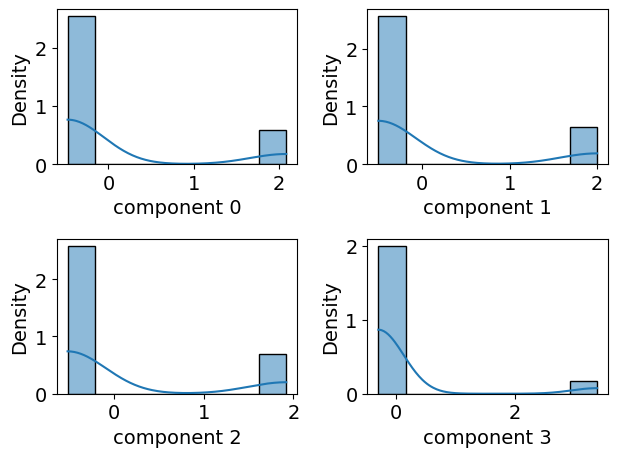

In [28]:
box_kdeplot_samples(data_scaled)

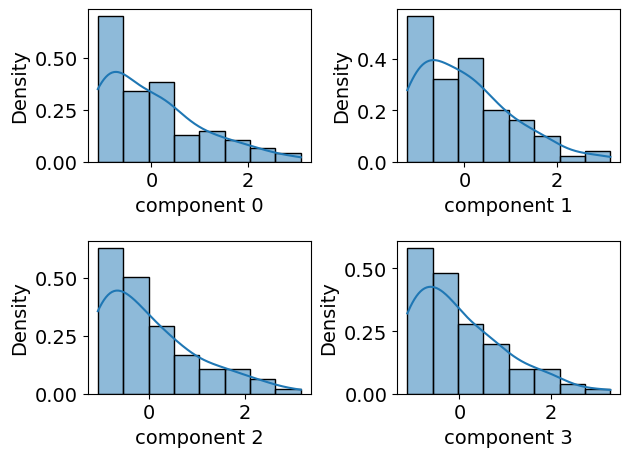

In [29]:
box_kdeplot_samples(all_val_samples_scaled)

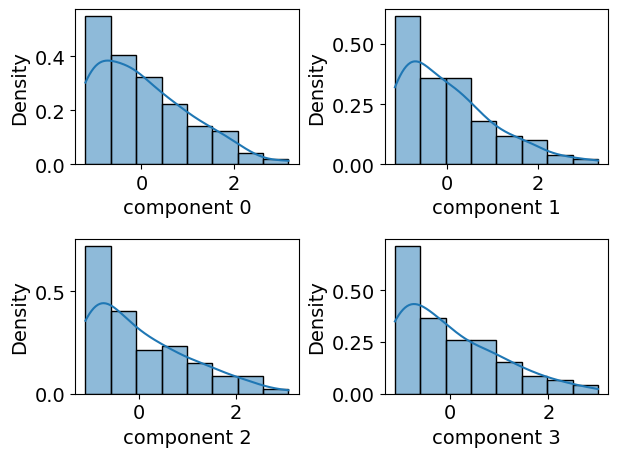

In [30]:
box_kdeplot_samples(all_val_samples_mdu_scaled)

In [31]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples_scaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu_scaled).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.027027027027027
variance lhs [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhs 2.0224719101123596
variance lhsmdu [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhsmdu 2.02247191011236


#### Distribution plots of unscaled data:

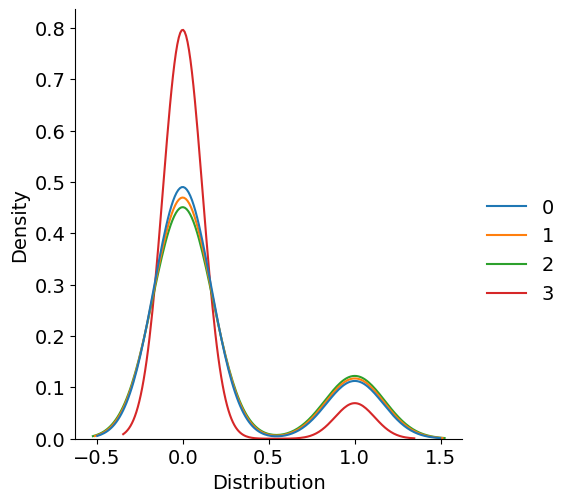

In [32]:
distplot_samples(data_array)

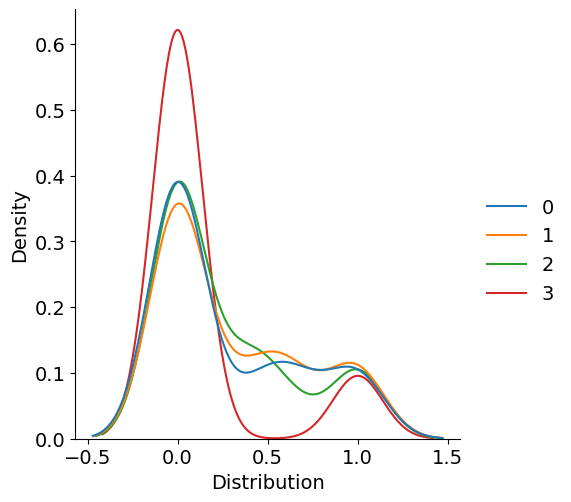

In [33]:
distplot_samples(all_val_samples)

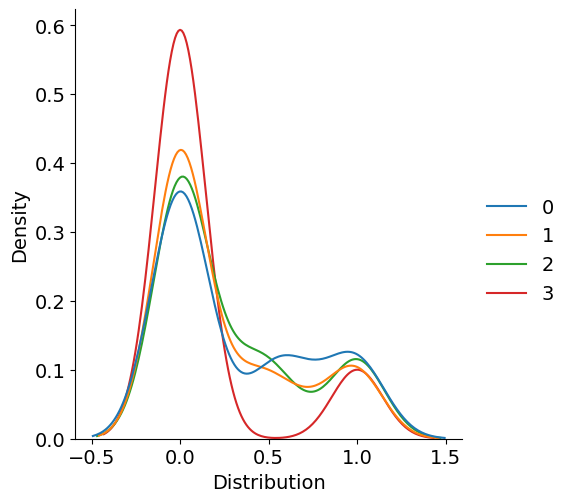

In [34]:
distplot_samples(all_val_samples_mdu)

#### Distribution subplots of unscaled data

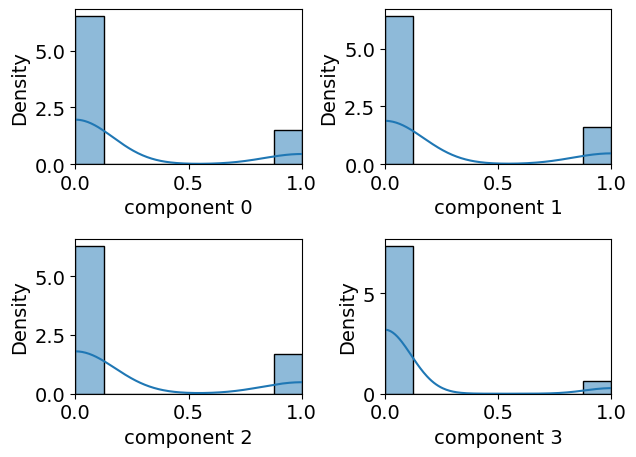

In [35]:
box_kdeplot_samples(data_array, fixed_ranges=bounds)

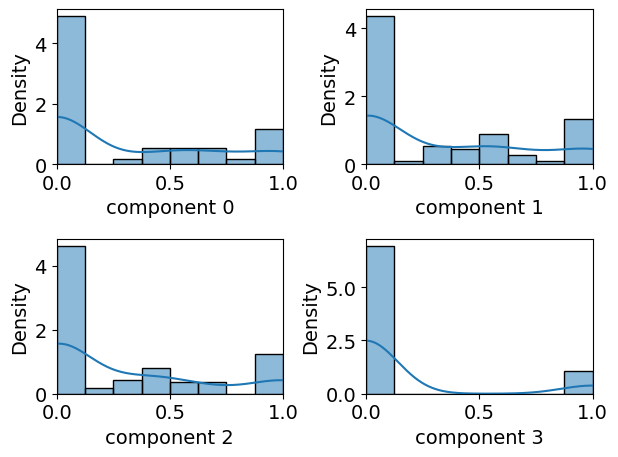

In [36]:
box_kdeplot_samples(all_val_samples, fixed_ranges=bounds)

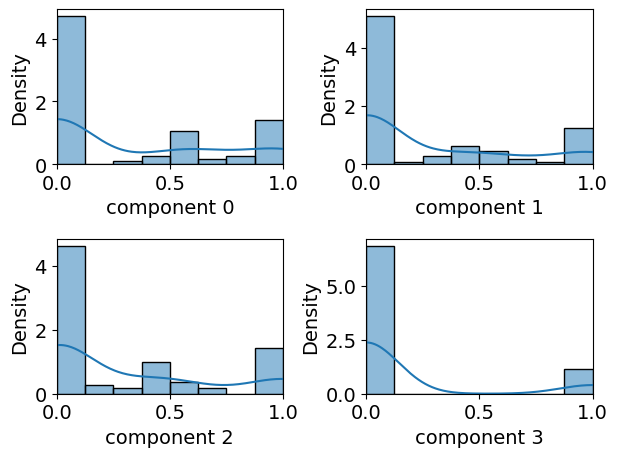

In [37]:
box_kdeplot_samples(all_val_samples_mdu, fixed_ranges=bounds)

In [38]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(all_val_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(all_val_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(all_val_samples_mdu).var(axis='index').to_numpy()))

variance data [0.15387387 0.16216216 0.17009009 0.07459459]
variance norm data 0.2906350429450088
variance lhs [0.1491222  0.14818822 0.13801888 0.11685393]
variance norm lhs 0.2773107144031768
variance lhsmdu [0.16339294 0.14121988 0.14787033 0.12496879]
variance norm lhsmdu 0.29003989260732305


#### Distribution plots of scaled reduced data

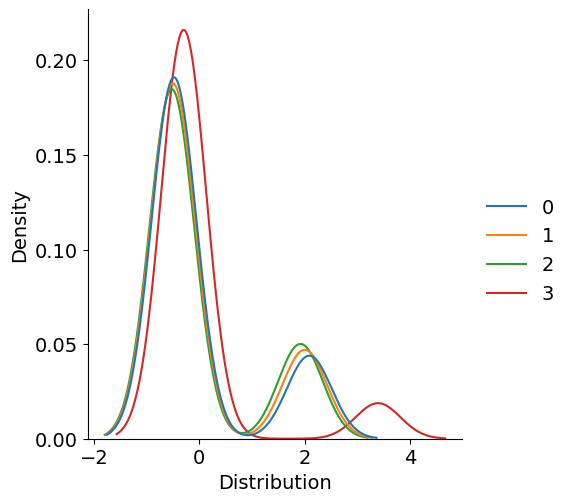

In [39]:
distplot_samples(data_scaled)

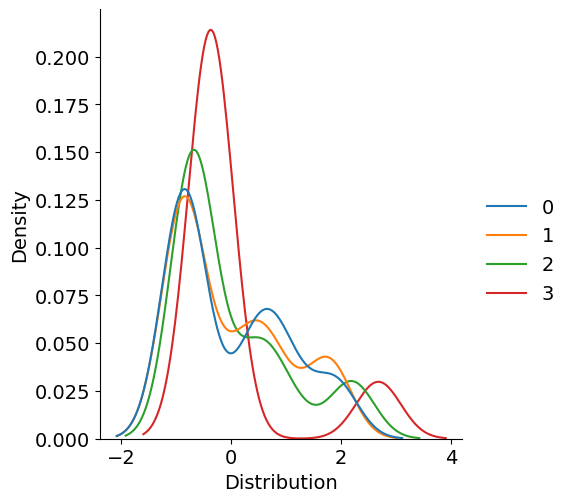

In [40]:
distplot_samples(tol_samples)

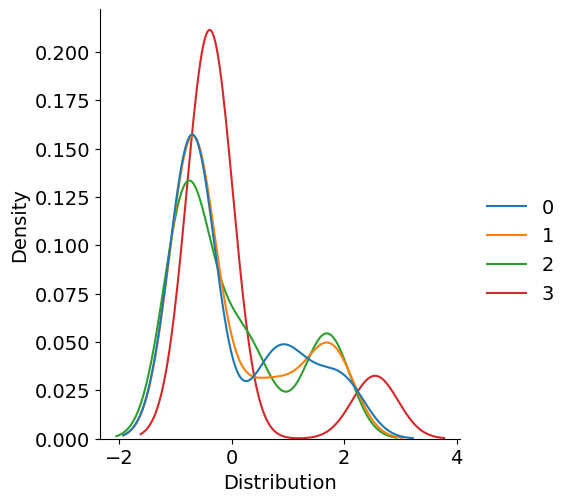

In [41]:
distplot_samples(tol_samples_LHSMDU)

#### Distribution subplots of scaled reduced data

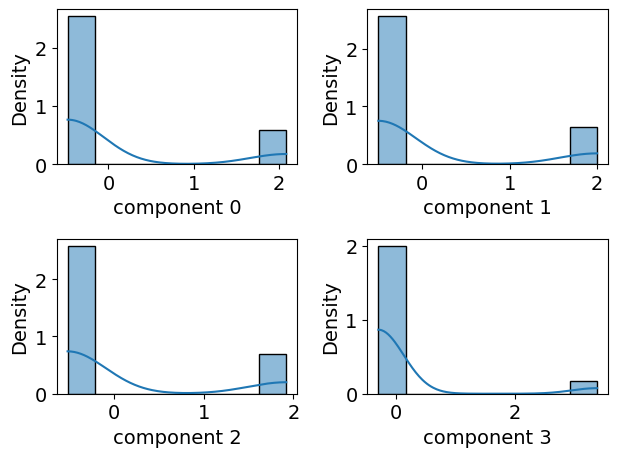

In [42]:
box_kdeplot_samples(data_scaled)

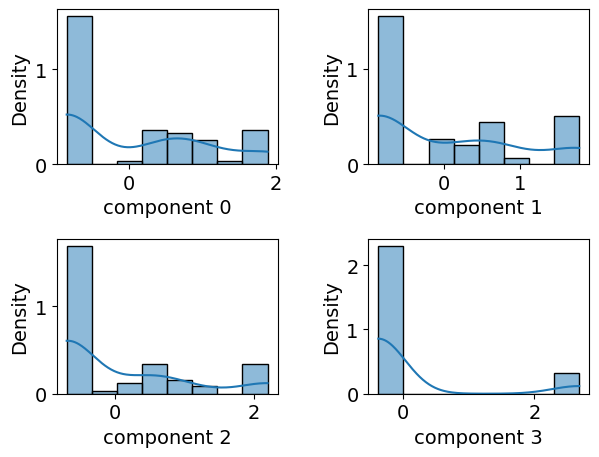

In [43]:
box_kdeplot_samples(tol_samples)


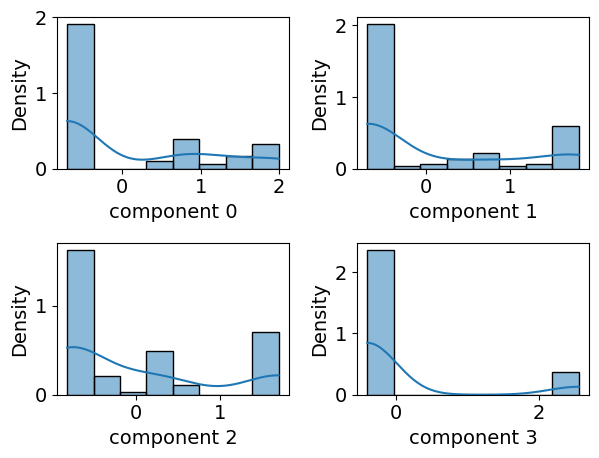

In [44]:
box_kdeplot_samples(tol_samples_LHSMDU)

#### Variances

In [45]:
print("variance data", pd.DataFrame(data_scaled).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_scaled).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU).var(axis='index').to_numpy()))

variance data [1.01351351 1.01351351 1.01351351 1.01351351]
variance norm data 2.027027027027027
variance lhs [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhs 2.022471910112358
variance lhsmdu [1.01123596 1.01123596 1.01123596 1.01123596]
variance norm lhsmdu 2.02247191011236


#### Distribution plots of unscaled reduced data:

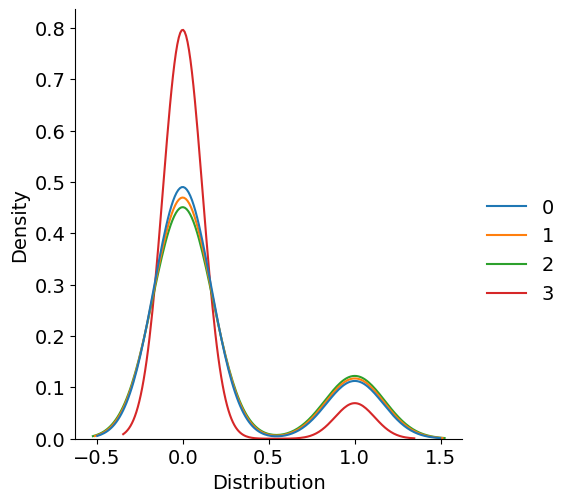

In [46]:
distplot_samples(data_array)

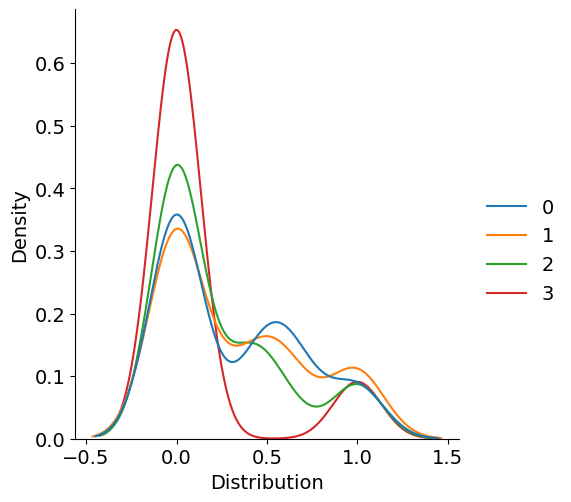

In [47]:
distplot_samples(tol_samples_unscaled)

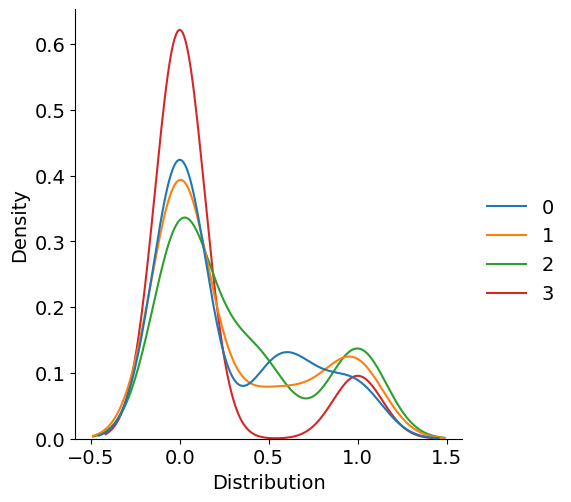

In [48]:
distplot_samples(tol_samples_LHSMDU_unscaled)

#### Distribution subplots of unscaled reduced data

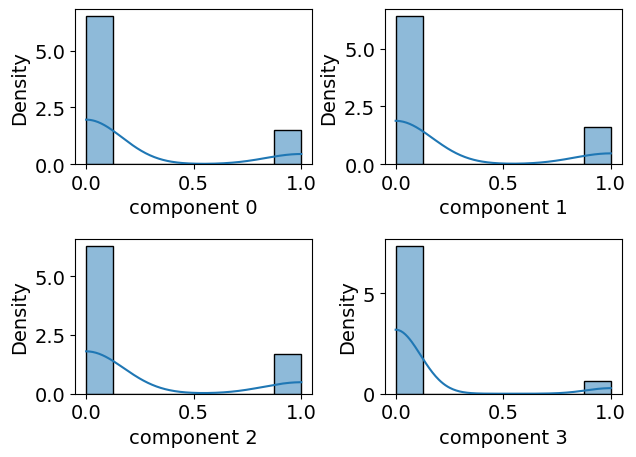

In [49]:
box_kdeplot_samples(data_array)

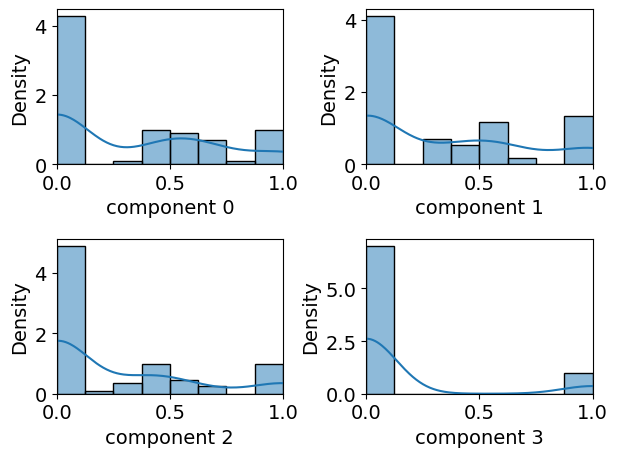

In [50]:
box_kdeplot_samples(tol_samples_unscaled, fixed_ranges=bounds)

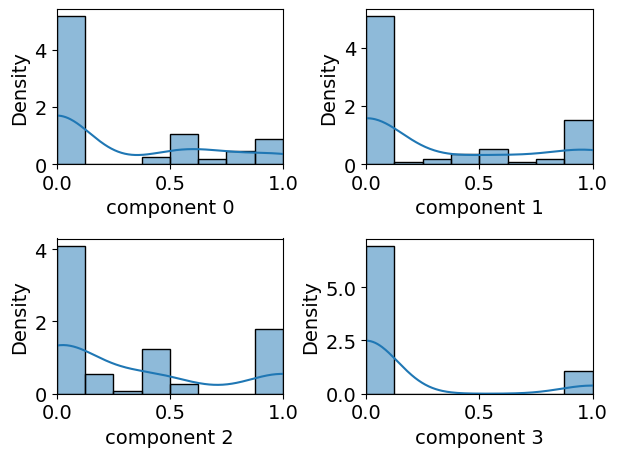

In [51]:
box_kdeplot_samples(tol_samples_LHSMDU_unscaled, fixed_ranges=bounds)

In [52]:
print("variance data", pd.DataFrame(data_array).var(axis='index').to_numpy())
print("variance norm data", np.linalg.norm(pd.DataFrame(data_array).var(axis='index').to_numpy()))
print("variance lhs", pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy())
print("variance norm lhs", np.linalg.norm(pd.DataFrame(tol_samples_unscaled).var(axis='index').to_numpy()))
print("variance lhsmdu", pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy())
print("variance norm lhsmdu", np.linalg.norm(pd.DataFrame(tol_samples_LHSMDU_unscaled).var(axis='index').to_numpy()))

variance data [0.15387387 0.16216216 0.17009009 0.07459459]
variance norm data 0.2906350429450088
variance lhs [0.13451353 0.14449541 0.12078017 0.10848939]
variance norm lhs 0.2555985355987463
variance lhsmdu [0.13897396 0.16019849 0.15923055 0.11685393]
variance norm lhsmdu 0.28980429093341864


### **5. Write results to csv files**

In [53]:
tol_samples_unscaled_df = pd.DataFrame(tol_samples_unscaled)
tol_samples_LHSMDU_unscaled_df = pd.DataFrame(tol_samples_LHSMDU_unscaled)

In [54]:
filepath = Path('Outputs/LHS_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv')  
save_to_csv(filepath, tol_samples_unscaled_df)

filepath2 = Path('Outputs/LHSMDU_with_new_permutations_correct_suggestions_allselected_imp_ext_subprobs_amino-based.csv')  
save_to_csv(filepath2, tol_samples_LHSMDU_unscaled_df) 

In [55]:
all_val_samples_df = pd.DataFrame(all_val_samples)
all_val_samples_mdu_df = pd.DataFrame(all_val_samples_mdu)

In [56]:
filepath3 = Path('Outputs/LHS_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve_amino-based.csv')  
save_to_csv(filepath3, all_val_samples_df)

filepath4 = Path('Outputs/LHSMDU_with_new_permutations_correct_all_suggestions_allselected_imp_ext_subprobs_improve_amino-based.csv')  
save_to_csv(filepath4, all_val_samples_mdu_df)

### **6. Show results**

In [57]:
tol_samples_unscaled_df

,0,1,2,3
0,0.550768,0.000000,0.449232,0.0
1,1.000000,0.000000,0.000000,0.0
2,0.000000,0.000000,0.000000,1.0
3,0.000000,0.000000,1.000000,0.0
4,0.616499,0.000000,0.383501,0.0
...,...,...,...,...
85,0.550768,0.000000,0.449232,0.0
86,0.000000,0.969845,0.030155,0.0
87,0.000000,0.000000,0.000000,1.0
88,0.000000,0.000000,1.000000,0.0


In [58]:
tol_samples_LHSMDU_unscaled_df

,0,1,2,3
0,0.000000,0.000000,0.000000,1.0
1,0.000000,0.776514,0.223486,0.0
2,0.583732,0.000000,0.416268,0.0
3,0.474525,0.000000,0.525475,0.0
4,0.000000,1.000000,0.000000,0.0
...,...,...,...,...
85,0.000000,0.000000,0.000000,1.0
86,0.000000,1.000000,0.000000,0.0
87,0.000000,0.000000,1.000000,0.0
88,0.000000,1.000000,0.000000,0.0
